In [ ]:
Insipired by the work A. A. Zhukov, W. V. Pogosov, Yu. E. Lozovik, arXiv:1710.09659 (2017) .


In [3]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.compiler import transpile, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
#from qiskit import IBMQ
#IBMQ.load_account() # Load account from disk
#IBMQ.providers()    # List all available providers

The wave function of the system with a central spin surrounded by 3 sites

In [27]:
def pes_wf(qc,phi):
    qc.x(1)
    qc.h(2)
    qc.u1(phi,2)
    qc.cx(2,1)
    qc.swap(0,1)
    #qc.barrier()

The circuit corresponding to time evolution for a single trotter step

In [28]:
def single_trotter(qc,theta):
    # v(tau)(Q1,Q0)
    qc.h(0)
    qc.h(1)
    qc.cx(0,1)
    qc.rz(theta,1)
    qc.cx(0,1)
    qc.h(0)
    qc.h(1)
    qc.rx(-np.pi/2,0)
    qc.rx(-np.pi/2,1)
    qc.cx(0,1)
    qc.rz(theta,1)
    qc.cx(0,1)
    qc.rx(np.pi/2,0)
    qc.rx(np.pi/2,1)
    
    #v(tau) (Q2,Q0)
    #qc.barrier()
    
    qc.h(1)
    qc.h(2)
    qc.cx(2,1)
    qc.rz(theta,1)
    qc.cx(2,1)
    qc.h(1)
    qc.h(2)
    qc.rx(-np.pi/2,1)
    qc.rx(-np.pi/2,2)
    qc.cx(2,1)
    qc.rz(theta,1)
    qc.cx(2,1)
    qc.rx(np.pi/2,1)
    qc.rx(np.pi/2,2)
    # See the circuit:
    #qc.draw('mpl')

Run the simulation for a single trotter step for different values of projection time and \phi

In [29]:

shots=4000
sim = Aer.get_backend('aer_simulator')
#provider = IBMQ.get_provider(hub='ibm-q')
#sim = provider.get_backend('ibmq_qasm_simulator')

occ_0 = []
occ_1 = []
occ_2 = []
occ_3 = []
occ_4 = []
for p in range(0,5):
    for i in range(0,250):
        qc = QuantumCircuit(3,1)
        phi=p*np.pi/4.
        theta=0.01*i
        
        pes_wf(qc,phi)
        
        single_trotter(qc,theta)
        
        qc.measure(1,0)
        
        qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
        result = sim.run(qobj,shots=shots).result() # Do the simulation and return the result
        res=result.get_counts()

        '''
	    #for real macine
        t_qc = transpile(qc, sim, optimization_level=3)
        job = sim.run(t_qc)
        job_monitor(job)  # displays job status under cell
        result = job.result() # Do the simulation and return the result
        res=result.get_counts()
        '''
        #print(res)
        r1=list(res.keys())
        r2=list(res.values())
        #print(r1)
        #print(r2)
        M=0
        cnt=0
        for j in range(0,len(r1)):
            if(int(r1[j])==0):
                S=1/2.*r2[j]
            else:
                S=-1/2.*r2[j] 
            M += 1/2.*r2[j] - S
            cnt += r2[j]
        locals()['occ_{0}'.format(p)].append(M/cnt)

/var/folders/hc/45_hfwrs1r94lcldj0dxtt7r0001t0/T/ipykernel_95855/1282071842.py:4: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(phi,2)


Plot the occupation of the central spin for different values of propagation time and \phi

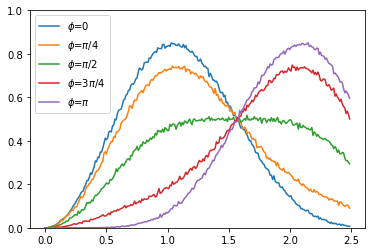

In [30]:
import matplotlib.pyplot as plt
t=np.arange(0.0,2.5,0.01)
plt.plot(t,occ_0,label=r'$\phi$=0')
#plt.plot(t,occ_real_1,label=r'$\phi$=0-real')
plt.plot(t,occ_1,label=r'$\phi$=$\pi$/4')
plt.plot(t,occ_2,label=r'$\phi$=$\pi$/2')
plt.plot(t,occ_3,label=r'$\phi$=3$\pi$/4')
plt.plot(t,occ_4,label=r'$\phi$=$\pi$')
plt.ylim([0,1.0])
plt.legend()
plt.show()